# A study of mental disorders in Ukraine and countries with the highest and lowest happiness indices 1990-2017
Kushnir Mykhailo 2023-2024

In this study, I have focused on mental disorders in Ukraine and the countries with the highest and lowest happiness indices. I particularly focused on depression, anxiety disorders and substance abuse and did not focus on schizophrenia and bipolar disorder because the nature of these disorders is not well understood and they may be strongly influenced by genetics, which is not the subject of this study.  

IMPORTANT NOTE: When a correlation is indicated between two mental disorders, it does not mean that one disorder somehow affects the other, there MAY be a causal relationship between them, but we cannot conclude that there is a direct link between an increase in the percentage of one disorder and an increase in the other based on this data alone, as there is insufficient evidence to do so.

## Chapter 0: Imports, Functions and Data Cleaning.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import statsmodels.api as sm
from scipy.stats import kruskal

In [2]:
def line(x : str, y : str, data : pd.DataFrame, title : str,  xlabel : str, ylabel : str, hue = None, palette = None, color  = "grey"):
    plt.figure(figsize=(12, 5))
    if hue == None:
        sns.lineplot(x=x, y=y, data=data, marker='o', markersize=8, color = color)
    else:
        sns.lineplot(x=x, y=y, data=data, hue = hue, palette=palette, marker='o', markersize=8)


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

In [3]:
def histograms(df : pd.DataFrame, title : str):
    float_columns = df.select_dtypes(include='float64')

    # Plot histograms for each float column
    plt.figure(figsize=(15, 10))
    for column in float_columns.columns:
        plt.subplot(3, 3, float_columns.columns.get_loc(column) + 1)  
        plt.hist(ukr_mental_df[column].dropna(), bins=20, color=sns.color_palette("Set2")[1], edgecolor='black')
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.suptitle(title, fontsize=16)  

    plt.tight_layout()

    plt.show()



In [4]:
def boxplots(df : pd.DataFrame, title : str):
    float_columns = df.select_dtypes(include='float64')

    # Plot boxplot for each float column
    plt.figure(figsize=(15, 10))
    for column in float_columns.columns:
        plt.subplot(3, 3, float_columns.columns.get_loc(column) + 1)  
        sns.boxplot(x=float_columns[column], color=sns.color_palette("Set2")[1])
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.suptitle(title, fontsize=16)  

    plt.tight_layout()

    plt.show()

In [5]:
mental_df = pd.read_csv(r'Mental health Depression disorder Data.csv')

C:\Users\Mykhailo Kushnir\AppData\Local\Temp\ipykernel_6732\2549539583.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mental_df = pd.read_csv(r'Mental health Depression disorder Data.csv')


In [6]:
mental_df.dtypes

index                          int64
Entity                        object
Code                          object
Year                          object
Schizophrenia (%)             object
Bipolar disorder (%)          object
Eating disorders (%)          object
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

Since this csv file contains few datasets and only first one is needed, the solution would be to drop all values null values 

In [7]:
mental_df.dropna(axis=0, inplace = True)
mental_df.drop('index', axis=1, inplace=True)
mental_df[(mental_df['Entity'] == "Ukraine") & (mental_df['Year'] == '1990')]


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
5992,Ukraine,UKR,1990,0.19169,0.684293,0.178687,2.932381,0.622307,4.356022,5.01917


To complete further analysis types of percentages were changed from objects to float.

In [43]:
columns_tofloat = ('Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)')
for column in columns_tofloat:
    mental_df[column] = mental_df[column].astype(float)


## Chapter 1: The World Situation

In [9]:
mental_df.describe()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000
mean,0.208183,0.716884,0.234023,3.946979,0.833328,3.474504,1.562273
std,0.041998,0.164246,0.154147,1.134810,0.441199,0.671741,0.861973
min,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940
25%,0.179452,0.615732,0.121761,3.178912,0.524018,2.955355,0.961545
50%,0.198510,0.693954,0.180378,3.515140,0.709090,3.461421,1.466906
75%,0.230553,0.830217,0.278681,4.659540,0.906843,3.877343,1.853683
max,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668


Heatmap that contains coefficients of correlation between all mental disorders that are available in dataset

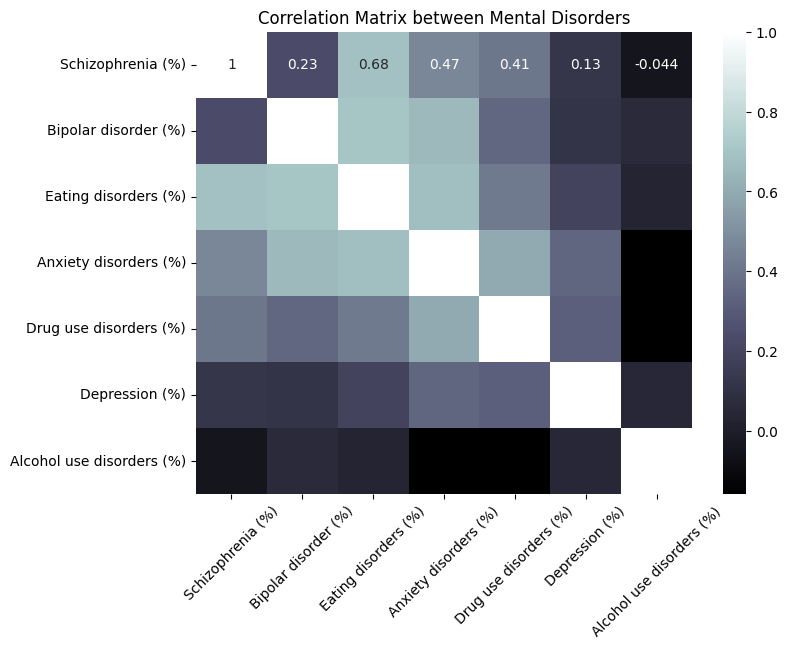

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(mental_df.select_dtypes('float64').corr(method='pearson'), annot=True, cmap='bone')
plt.title('Correlation Matrix between Mental Disorders')
plt.xticks(rotation=45)
plt.show()

So, the largest correlation coefficient is between schizophrenia and eating disorders, between bipolar disorder and eating disorders and between anxiety disorders and eating disorders. Interestingly enough that we can see eating disorders appearing in all three cases, however other three disorders are not not highly correlated with each other. Also, pairplot was provided as well as boxplot for each variable to see distribution of every mental disorders as well as their relationship with each other.

<Figure size 1000x800 with 0 Axes>

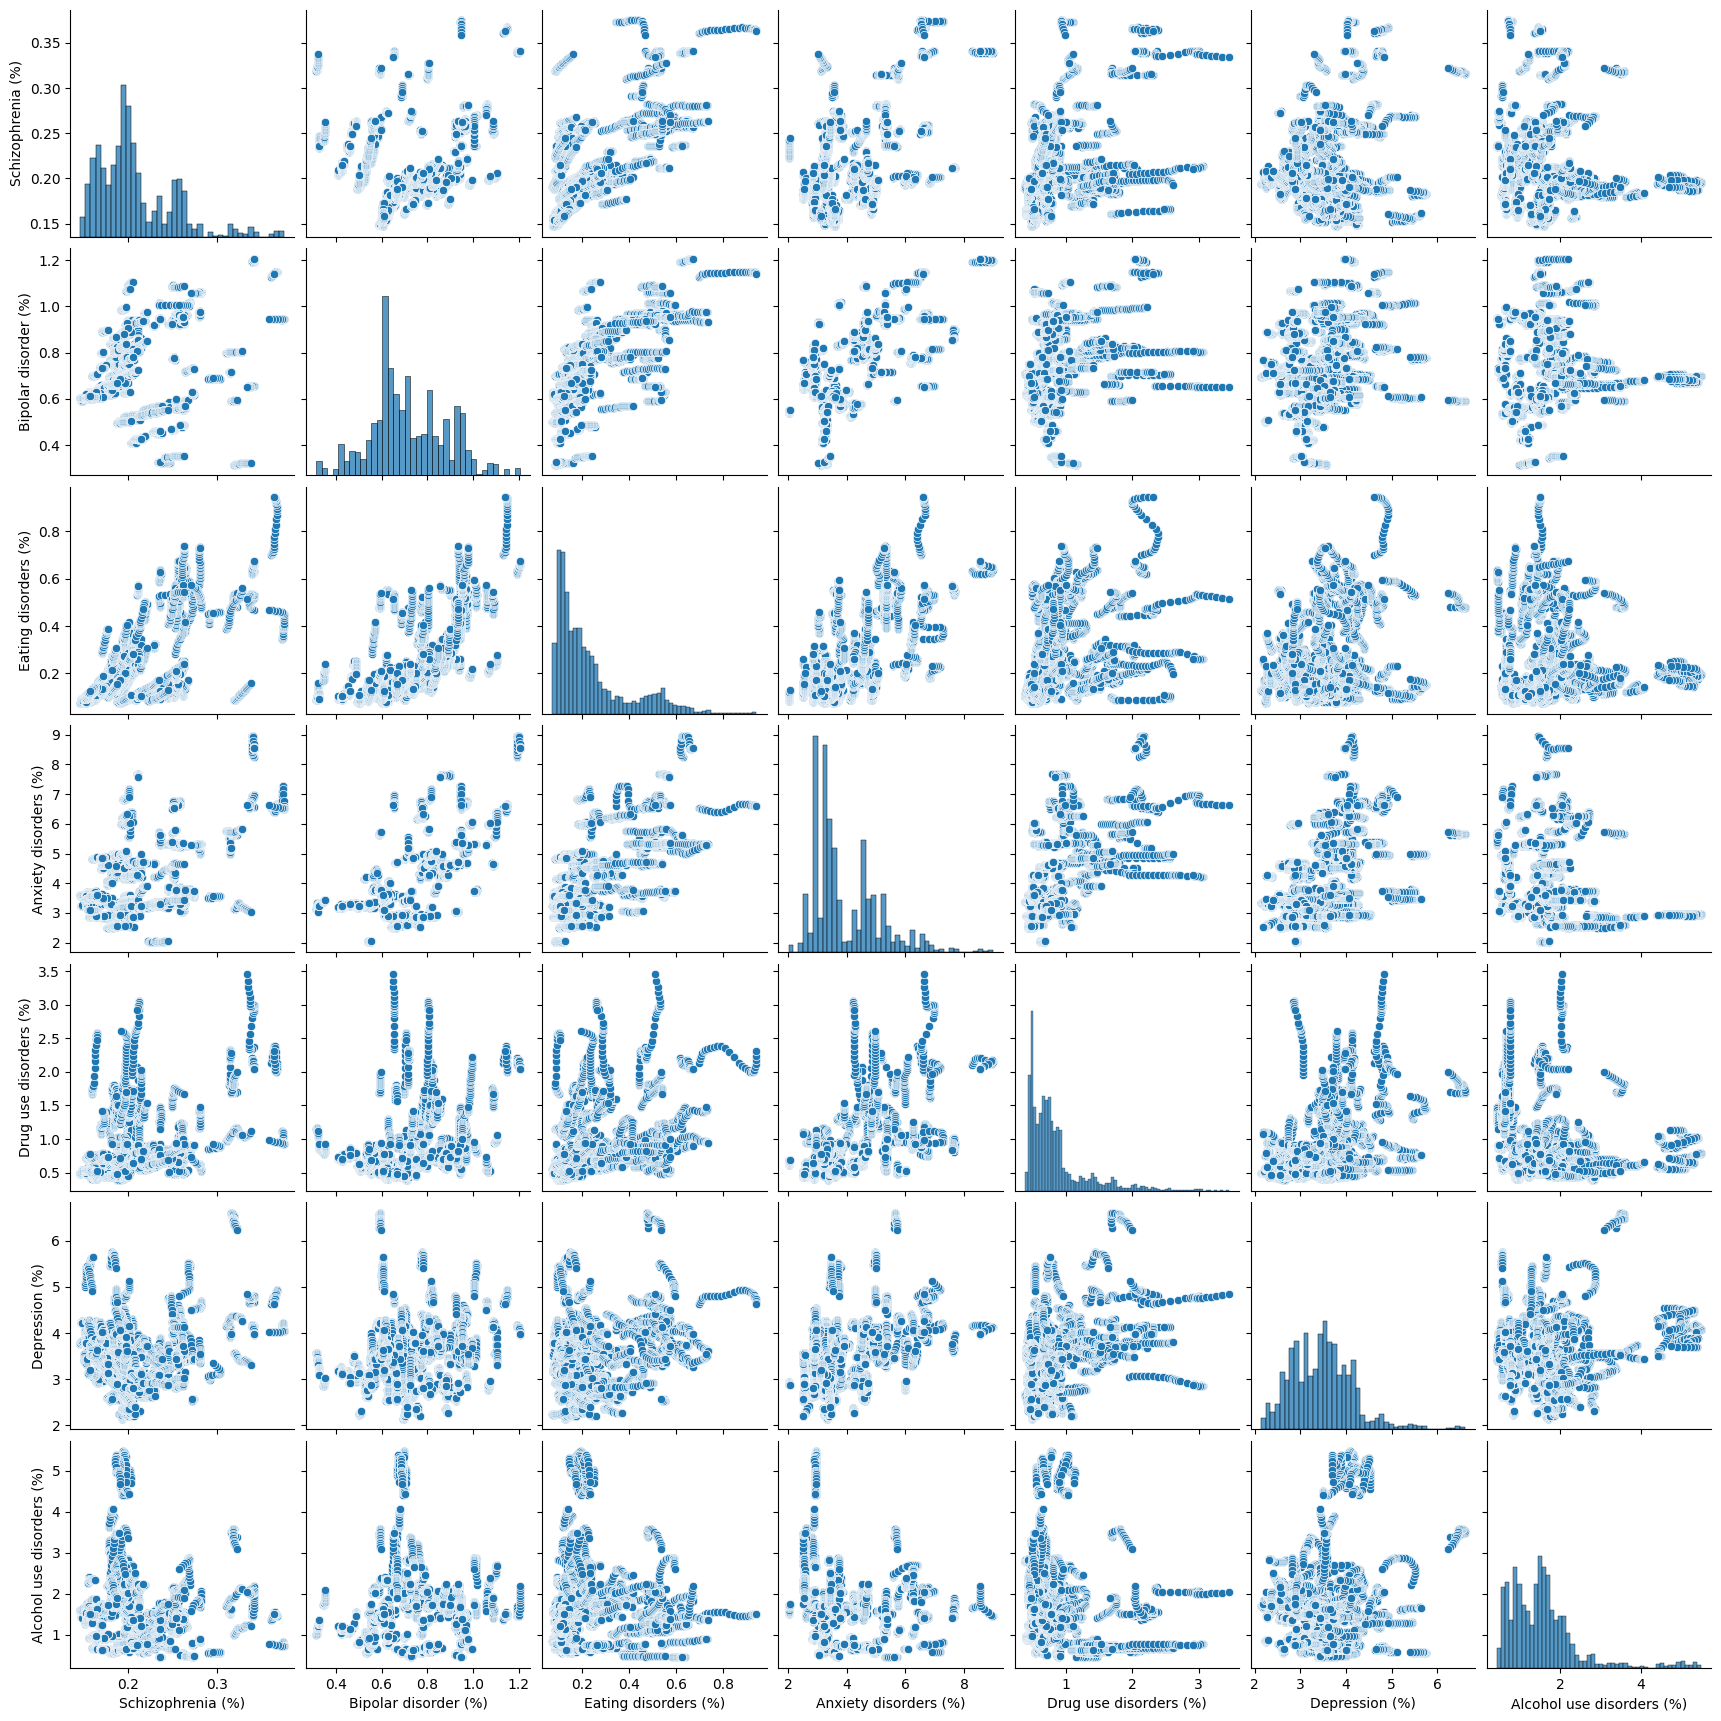

In [11]:
plt.figure(figsize=(10, 8))
sns.pairplot(mental_df.iloc[:,3:11])
plt.show()

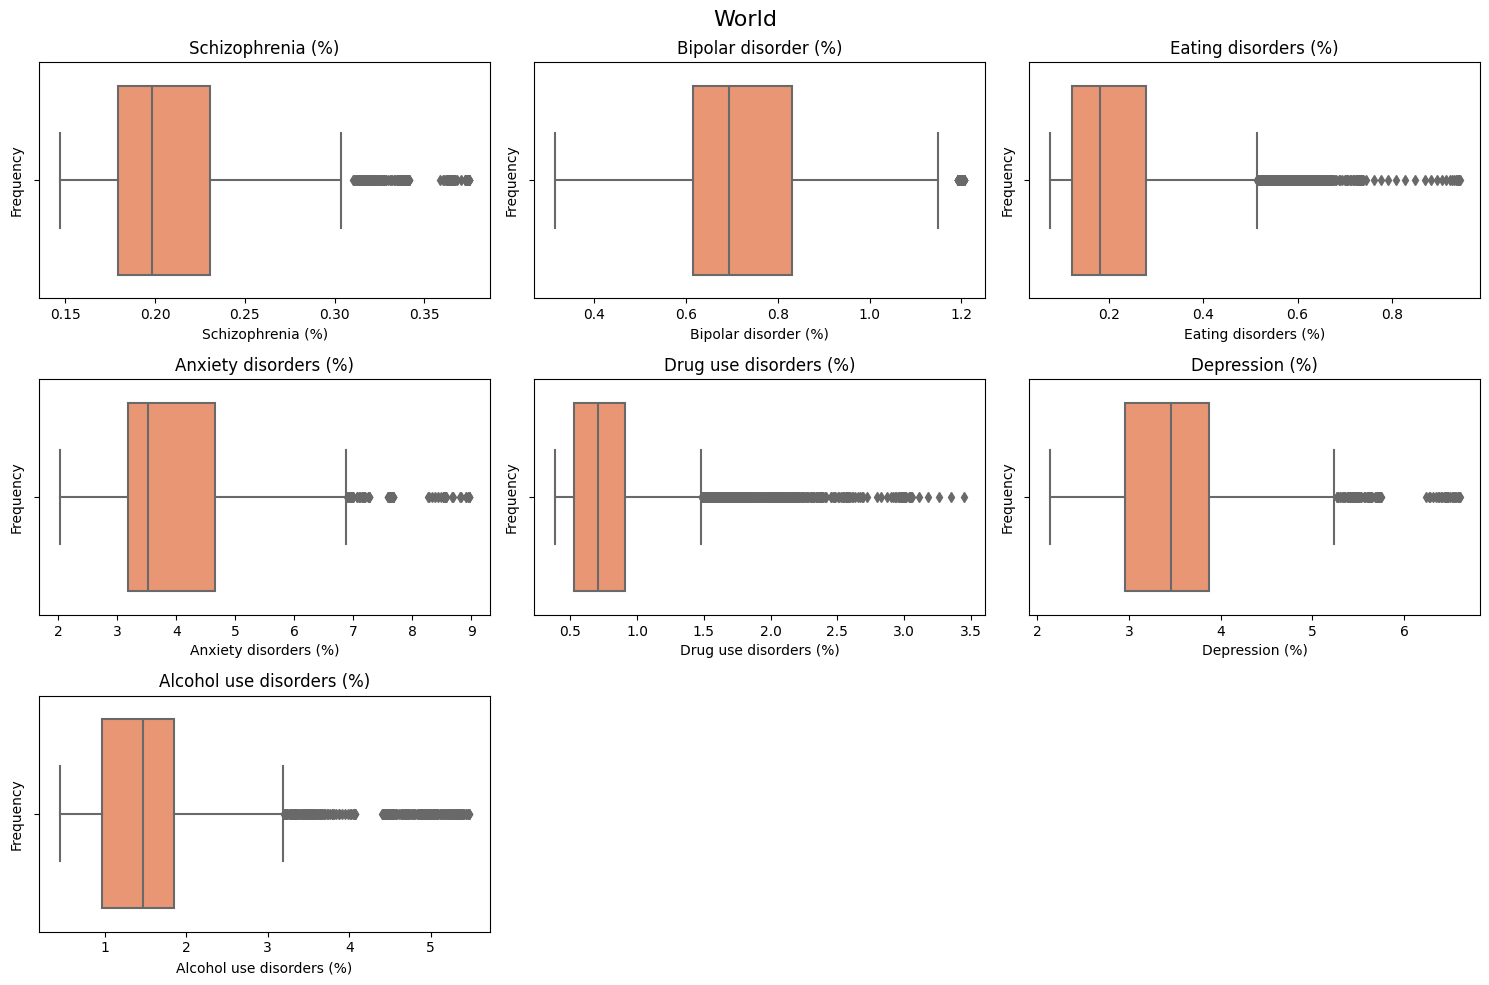

In [44]:
boxplots(mental_df, 'World')

## Chapter 2: Ukraine

Now that we are familiar with overall look of the dataset, we can dive deeper to find interesting insights. Our next step would be investigation of mental disorders in Ukraine, as it is very interesting for me to compare Ukraine with other countries. As in previous chapter, heat map and pairplot were created to see how disorders are correlated in Ukraine. We can observe high positive correlation between schizophrenia and eating disorders, between schizophrenia and anxiety, between bipolar disorders and drug use disorders.  An interesting fact is that depression and alcohol use disorders are negatively correlated with all other disorders, but have a high positive correlation with each other.

In [12]:
ukr_mental_df = mental_df[(mental_df['Entity'] == "Ukraine")]
ukr_mental_df.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
5992,Ukraine,UKR,1990,0.191690,0.684293,0.178687,2.932381,0.622307,4.356022,5.019170
5993,Ukraine,UKR,1991,0.191519,0.684220,0.176239,2.935784,0.621933,4.375869,5.080043
5994,Ukraine,UKR,1992,0.191262,0.684135,0.173192,2.937874,0.623023,4.394591,5.135332
5995,Ukraine,UKR,1993,0.190943,0.684060,0.170338,2.938892,0.624558,4.410799,5.183603
5996,Ukraine,UKR,1994,0.190582,0.683990,0.167324,2.938963,0.625941,4.422658,5.223568


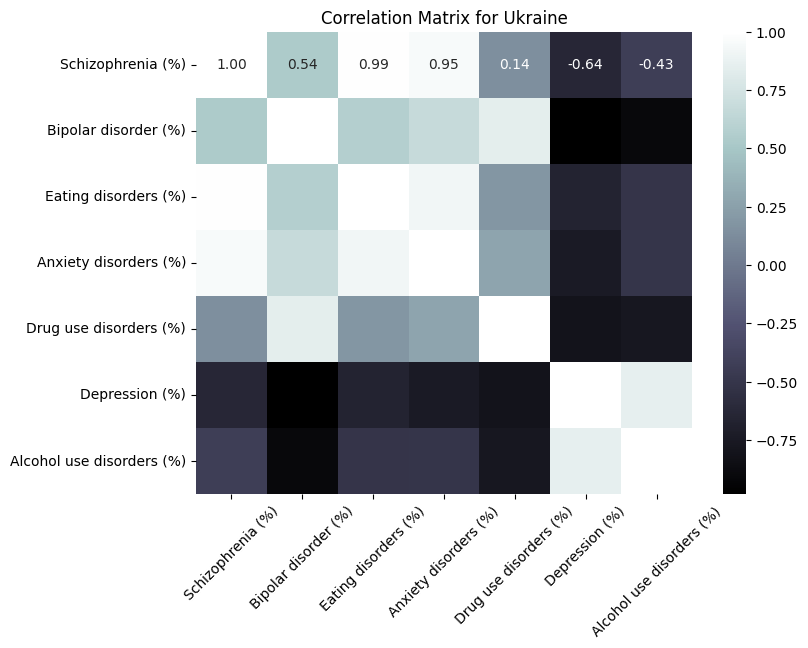

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(ukr_mental_df.select_dtypes('float64').corr(method='pearson'), fmt=".2f", cmap='bone', annot=True)
plt.title('Correlation Matrix for Ukraine')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

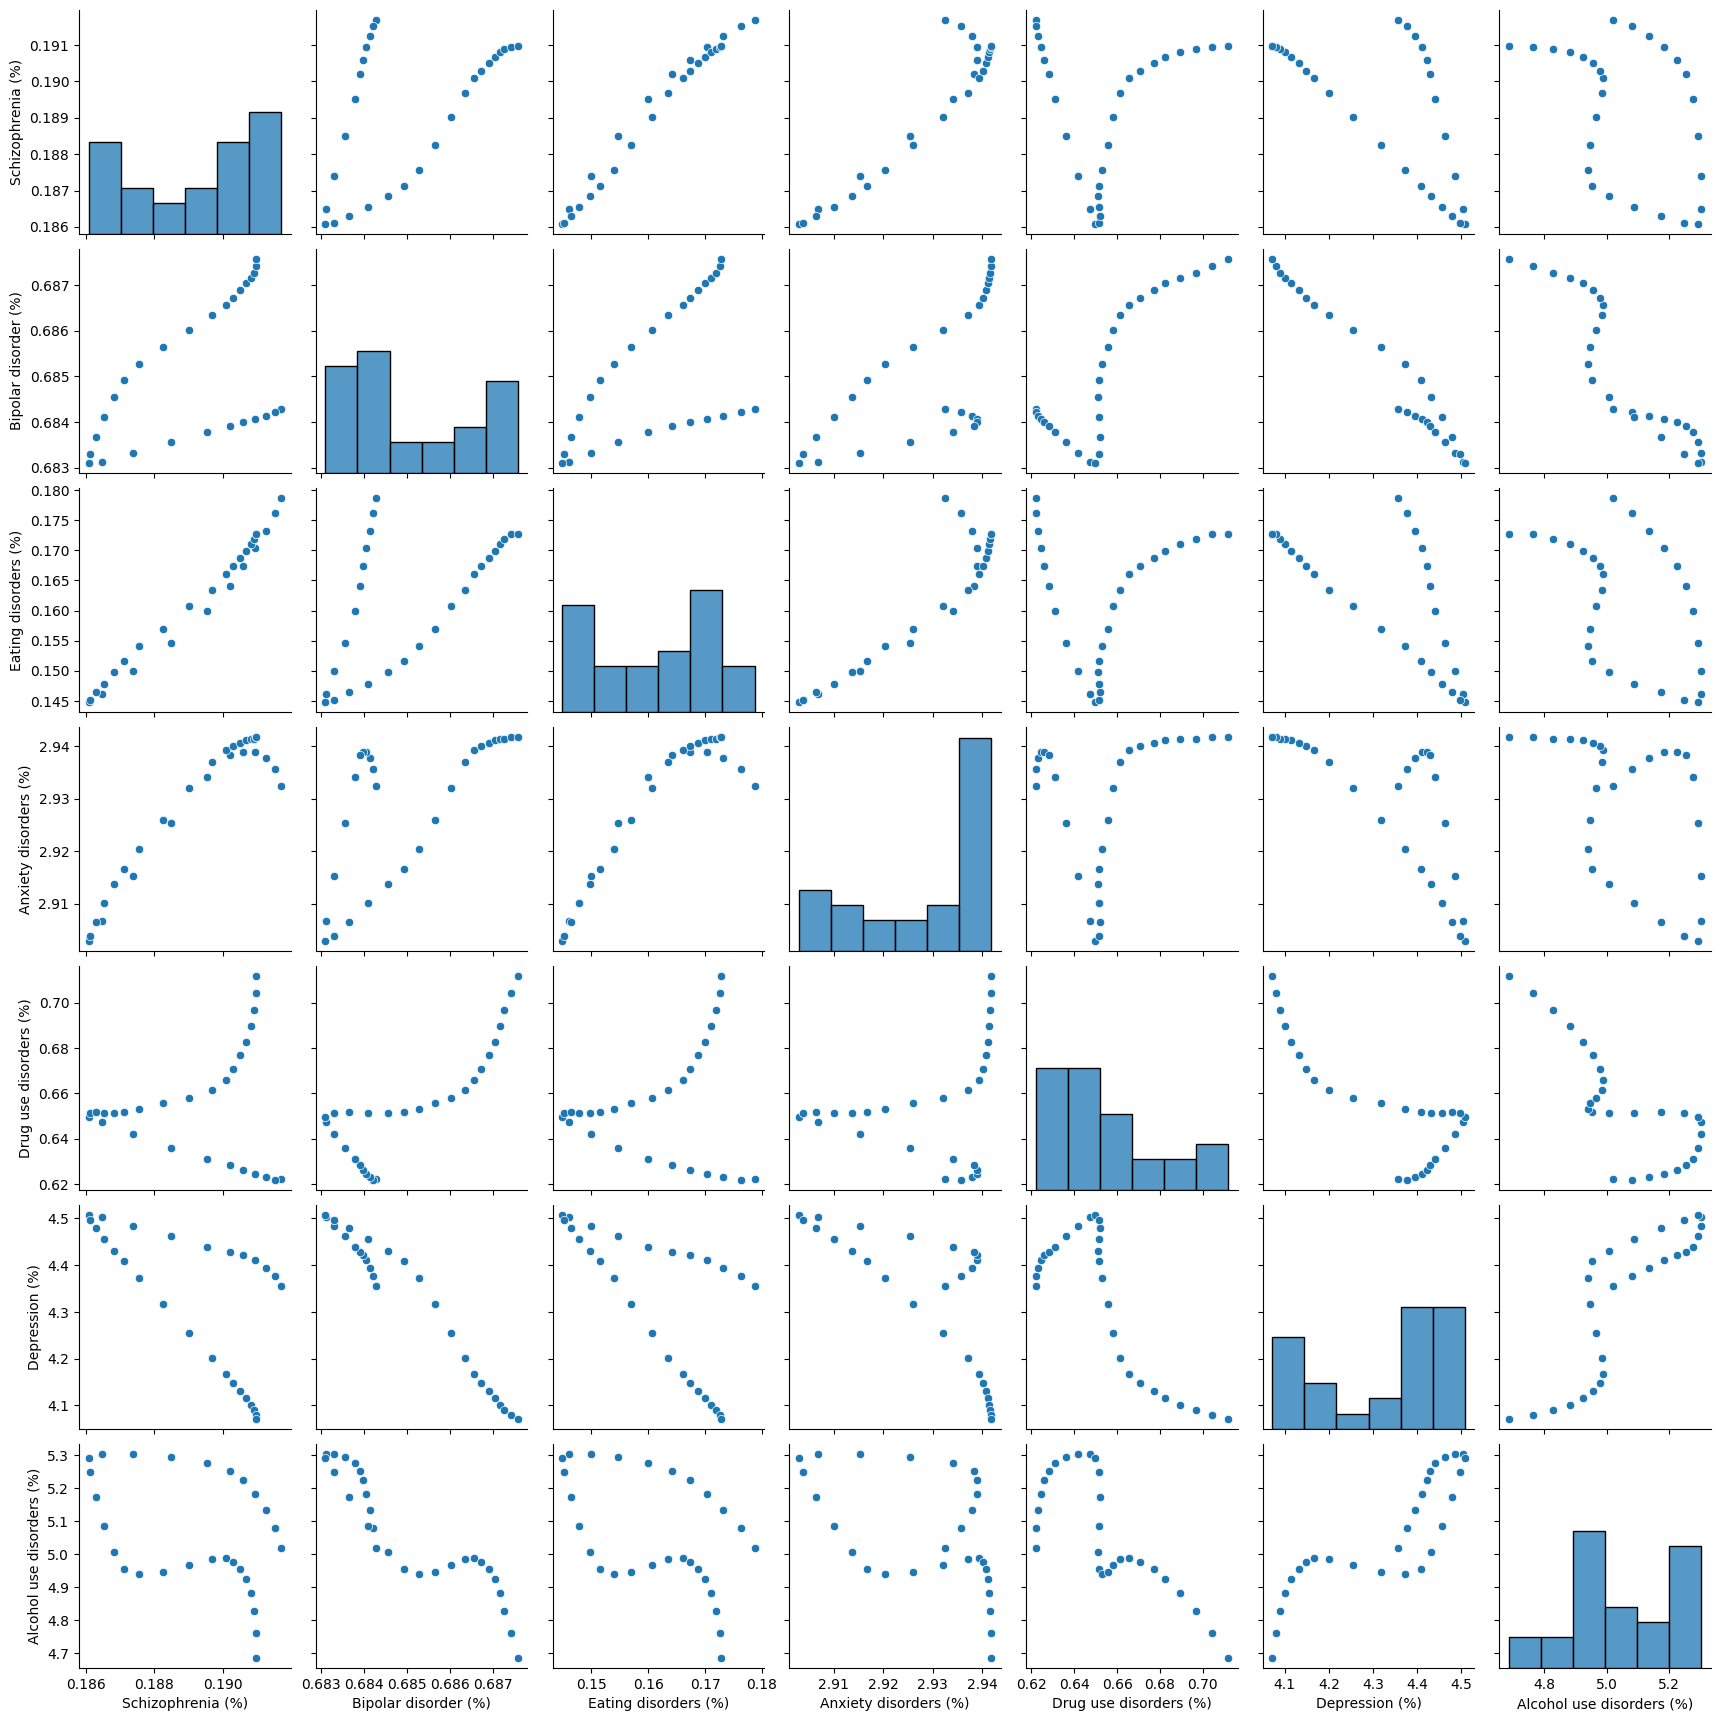

In [14]:
plt.figure(figsize=(10, 8))
sns.pairplot(ukr_mental_df.iloc[:,3:11])
plt.show()

Next step would be to take a closer look at depression and alcohol use disorders. Starting with describe method, that provides us with some descriptive statistics, we can see that percentage of depression is so high, that its minimum value is 4.09% (one in twenty-five people struggles with depression). Furthermore, the perceentage of alcohol use disorder is even higher (one in twenty people struggles with alcohol use disorder).

In [15]:
ukr_mental_df.describe()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.189170,0.685072,0.161505,2.928580,0.654869,4.325318,5.059726
std,0.001915,0.001524,0.010698,0.013642,0.025225,0.153592,0.174472
min,0.186089,0.683111,0.144893,2.902919,0.621933,4.071915,4.686883
25%,0.187318,0.683889,0.151191,2.916334,0.634755,4.162466,4.952171
50%,0.189893,0.684423,0.163799,2.934937,0.651642,4.385230,5.012640
75%,0.190830,0.686598,0.170536,2.939561,0.666944,4.443800,5.229936
max,0.191690,0.687572,0.178687,2.941808,0.711814,4.507426,5.303688


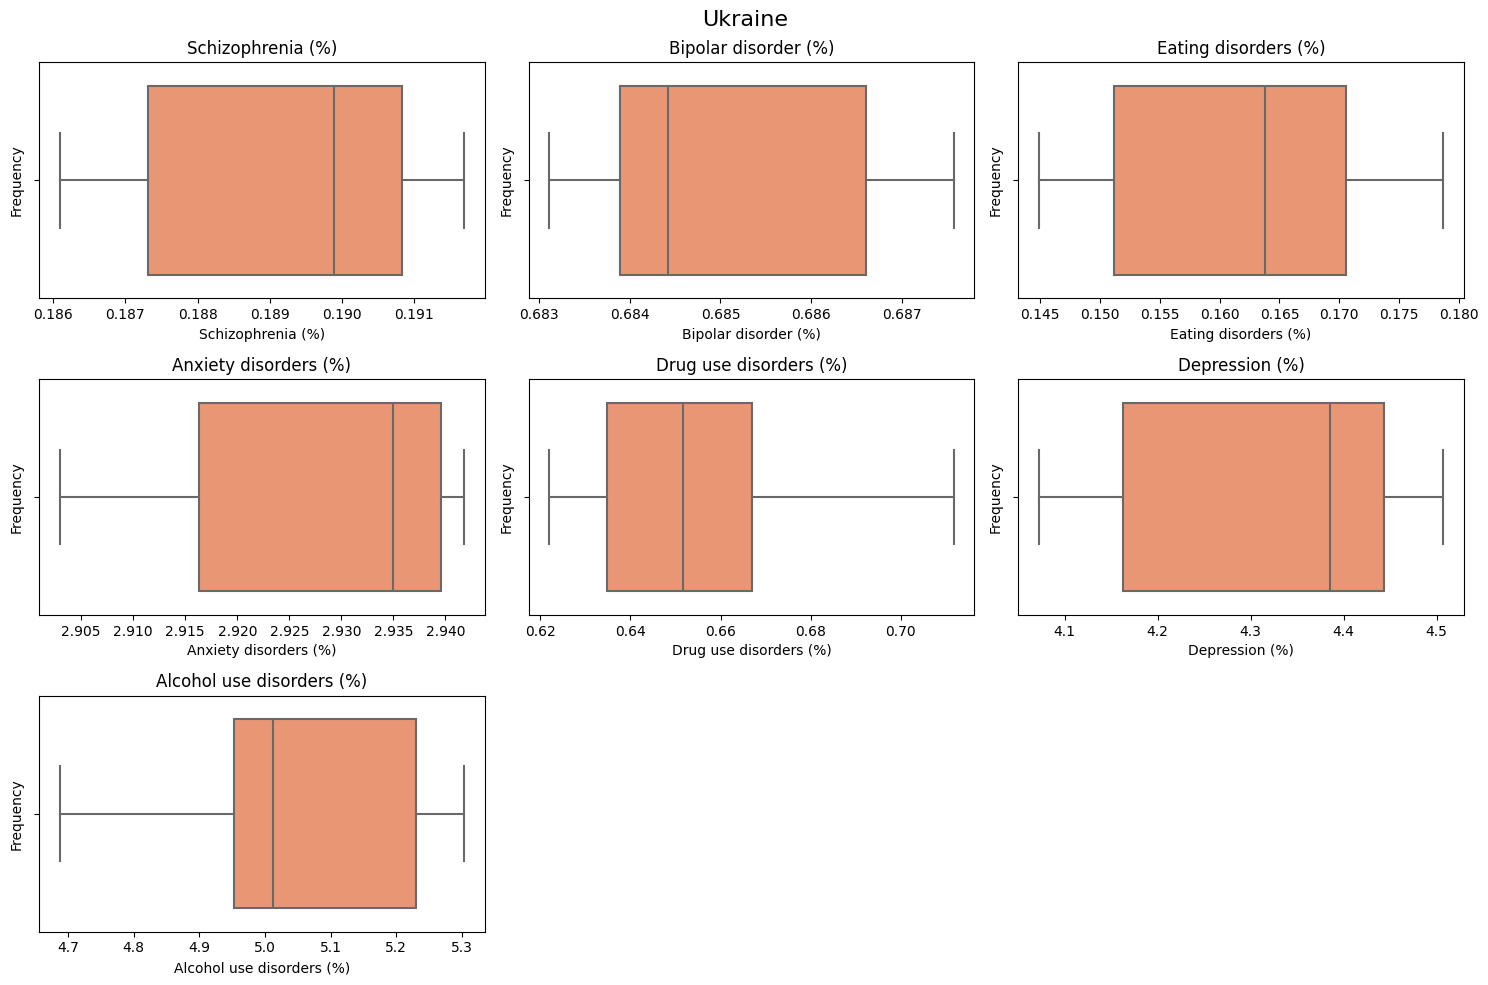

In [17]:
boxplots(ukr_mental_df, "Ukraine")

Since a percantage of alcohol usage in Ukraine is huge (value of 3rd quartile in entire world is 1.85, while in Ukraine maximum value is 5.30), It is interesting to compare It with with other countries. By comparing mean values of percentage of alcohol usage disorders in all countries, we can notice that only Belarus and Russia has a higher rate. In addition, It is interesting to notice that difference between five highest values are around 0.1 to 0.2 per cent but difference between fifth and sixth value is 0.7%, which is relatively high difference. Except of Greenland, all countries in list below were part of Soviet Union.

In [18]:
mental_df.groupby('Entity')['Alcohol use disorders (%)'].mean().sort_values(ascending=False).head(10)


Entity
Belarus       5.286263
Russia        5.158491
Ukraine       5.059726
Estonia       4.917451
Lithuania     4.704283
Latvia        4.550339
Moldova       3.832632
Greenland     3.433462
Kyrgyzstan    3.107235
Kazakhstan    3.035775
Name: Alcohol use disorders (%), dtype: float64

Another interesting finding is that alcohol use and depression peaked in 1996 and 2002, which is not that surprising, given difficult economic situation of a country,  the collapse of the Soviet Union and other factors like cheap and accessible alcohol, as well as other social problems.

In [19]:
#top 5 years with highest Alcohol use disorders % in Ukraine
ukr_mental_df.nlargest(5, 'Alcohol use disorders (%)')



,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6001,Ukraine,UKR,1999,0.186488,0.683128,0.146146,2.906701,0.647295,4.503236,5.303688
6000,Ukraine,UKR,1998,0.187387,0.683316,0.150045,2.915301,0.641950,4.484227,5.303666
5999,Ukraine,UKR,1997,0.188494,0.683565,0.154627,2.925444,0.636004,4.461873,5.293704
6002,Ukraine,UKR,2000,0.186089,0.683111,0.144893,2.902919,0.649712,4.507426,5.291401
5998,Ukraine,UKR,1996,0.189522,0.683788,0.159959,2.934089,0.631008,4.439765,5.276104


In [20]:
#top 5 years with highest Depression % in Ukraine
ukr_mental_df.nlargest(5, 'Depression (%)')


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6002,Ukraine,UKR,2000,0.186089,0.683111,0.144893,2.902919,0.649712,4.507426,5.291401
6001,Ukraine,UKR,1999,0.186488,0.683128,0.146146,2.906701,0.647295,4.503236,5.303688
6003,Ukraine,UKR,2001,0.186118,0.683304,0.145149,2.903718,0.651397,4.497791,5.249041
6000,Ukraine,UKR,1998,0.187387,0.683316,0.150045,2.915301,0.641950,4.484227,5.303666
6004,Ukraine,UKR,2002,0.186290,0.683665,0.146420,2.906375,0.651806,4.478600,5.173970


### In summary

Ukraine suffers from high rates of alcohol consumption and depression. The number of alcohol-related disorders is particularly high, with only russians and belarusians drinking more alcohol than ukrainians. It's good to see that there is a negative upward trend in alcohol use and depression that we can see in the two thousand, but we only have data up to 2017, so given COVID-19 and then the war, we can assume that there is a huge increase in alcohol use and especially depression. Unfortunately, I was not able to find a valid data for 2018-2024 years, as the studies that I found included only analysis of students, which is very biased and we do not have possibility to make accurate analysis using this data. Below you can see charts that are showing how percentage changes.


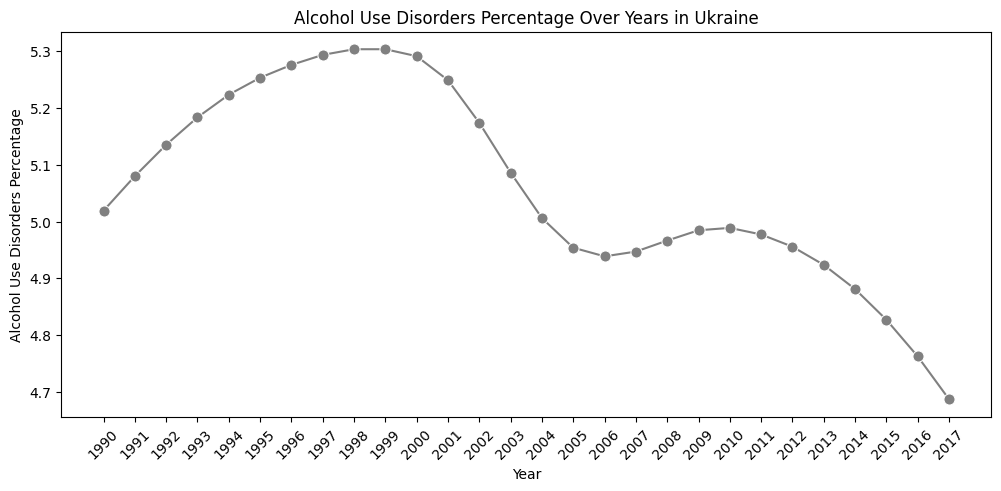

In [21]:
line('Year', 'Alcohol use disorders (%)', ukr_mental_df, 'Alcohol Use Disorders Percentage Over Years in Ukraine', 'Year', 'Alcohol Use Disorders Percentage')

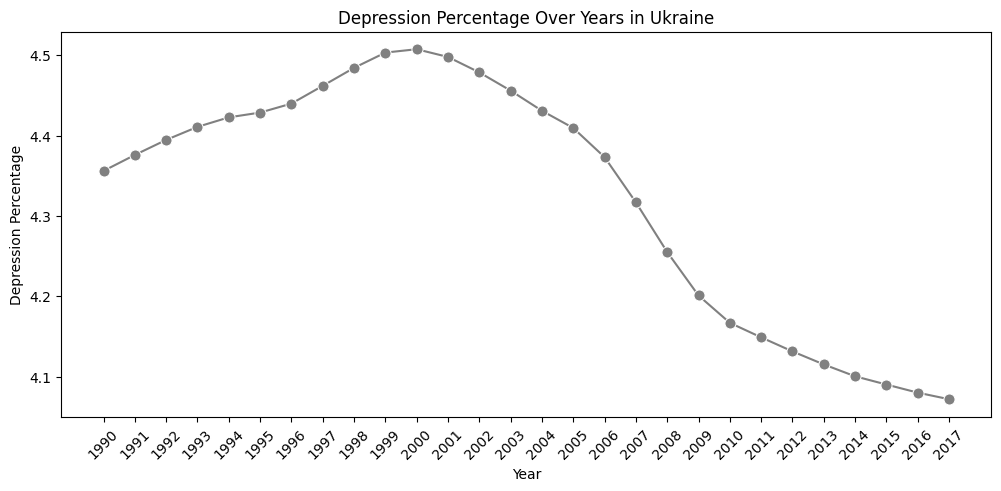

In [22]:
line('Year', 'Depression (%)', ukr_mental_df, 'Depression Percentage Over Years in Ukraine', 'Year', 'Depression Percentage')

## Chapter 3: Comparison of the happiest and unhappiest countries

For me it was very interesting to find out if what the difference between happy and unhappy countries in context of mental disorders, so I chose three countries with highest (Finland, Denmark, Iceland) and three with the lowest (Afghanistan, Lebanon, Sierra Leone) Happiness Index (0 (unhappy) - 10 (happy)). This data can be found in The World Happiness Report.

The World Happiness Report is a publication featuring articles and rankings that assess national happiness levels based on individuals' self-assessment of their own lives. The report also examines correlations between happiness and various aspects of quality of life (QOL).

Quality of life (QOL) is defined by the World Health Organization as an individual's perception of their overall well-being within the cultural and societal frameworks they inhabit, considering their aspirations, standards, and concerns. Common indicators of QOL encompass financial prosperity, employment status, environmental conditions, physical and mental health, educational opportunities, recreational activities, social connections, spiritual beliefs, safety, security, and personal freedoms. 

In [23]:
top3_happy = mental_df[(mental_df['Entity'] == "Finland") | (mental_df['Entity'] == "Denmark") | (mental_df['Entity'] == "Iceland")]
top3_happy

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
1568,Denmark,DNK,1990,0.236182,1.012740,0.482745,5.309492,0.878859,3.884206,1.491188
1569,Denmark,DNK,1991,0.236229,1.012908,0.482590,5.310094,0.878043,3.881674,1.507171
1570,Denmark,DNK,1992,0.236241,1.013019,0.482878,5.310544,0.875904,3.874271,1.524580
1571,Denmark,DNK,1993,0.236239,1.013136,0.484274,5.310798,0.872430,3.864724,1.542742
1572,Denmark,DNK,1994,0.236214,1.013203,0.485395,5.310951,0.871507,3.847608,1.561136
...,...,...,...,...,...,...,...,...,...,...
2655,Iceland,ISL,2013,0.256879,0.967422,0.553140,5.293785,0.689168,3.361856,1.218249
2656,Iceland,ISL,2014,0.256999,0.968336,0.555098,5.294874,0.695549,3.361046,1.224274
2657,Iceland,ISL,2015,0.257168,0.969292,0.556969,5.294539,0.703828,3.360755,1.231484
2658,Iceland,ISL,2016,0.257376,0.970194,0.557838,5.292820,0.713351,3.360144,1.240083


We can see that people in happy countries are mostly suffering from Depression an Anxiety disorders, however the range is quite large (minimum value of depression in 3.27 and maximum is 5.51, while minimum value of anxiety disorders is 3.7 and maximum is 5.31). Also I would like to focus our attention on substance usage disorders.

In [24]:
top3_happy.describe()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.255562,0.987889,0.535126,4.776617,0.805905,4.048357,1.869931
std,0.011536,0.032547,0.034434,0.743993,0.080692,0.832799,0.651131
min,0.235335,0.921197,0.482590,3.707050,0.681506,3.275031,1.159994
25%,0.254205,0.965532,0.508320,3.748868,0.708187,3.361823,1.210020
50%,0.256913,1.005083,0.534049,5.286766,0.848641,3.585373,1.739413
75%,0.267943,1.012782,0.555566,5.310572,0.871738,4.966223,2.631245
max,0.270138,1.017617,0.594938,5.317616,0.951914,5.512826,2.873867


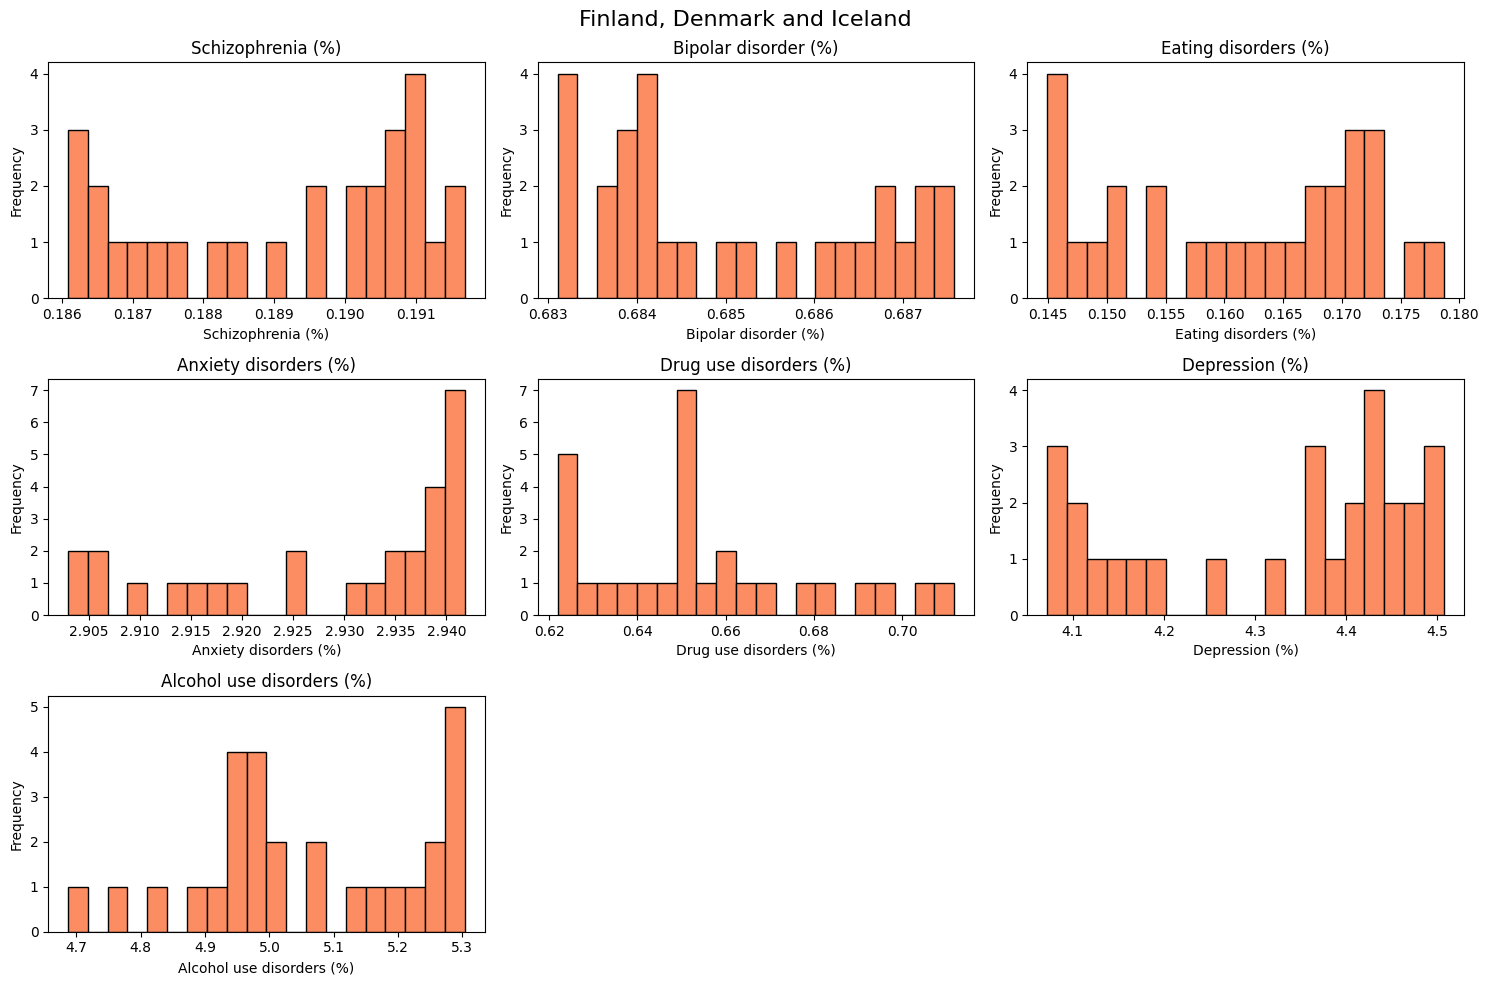

In [25]:
histograms(top3_happy, "Finland, Denmark and Iceland")

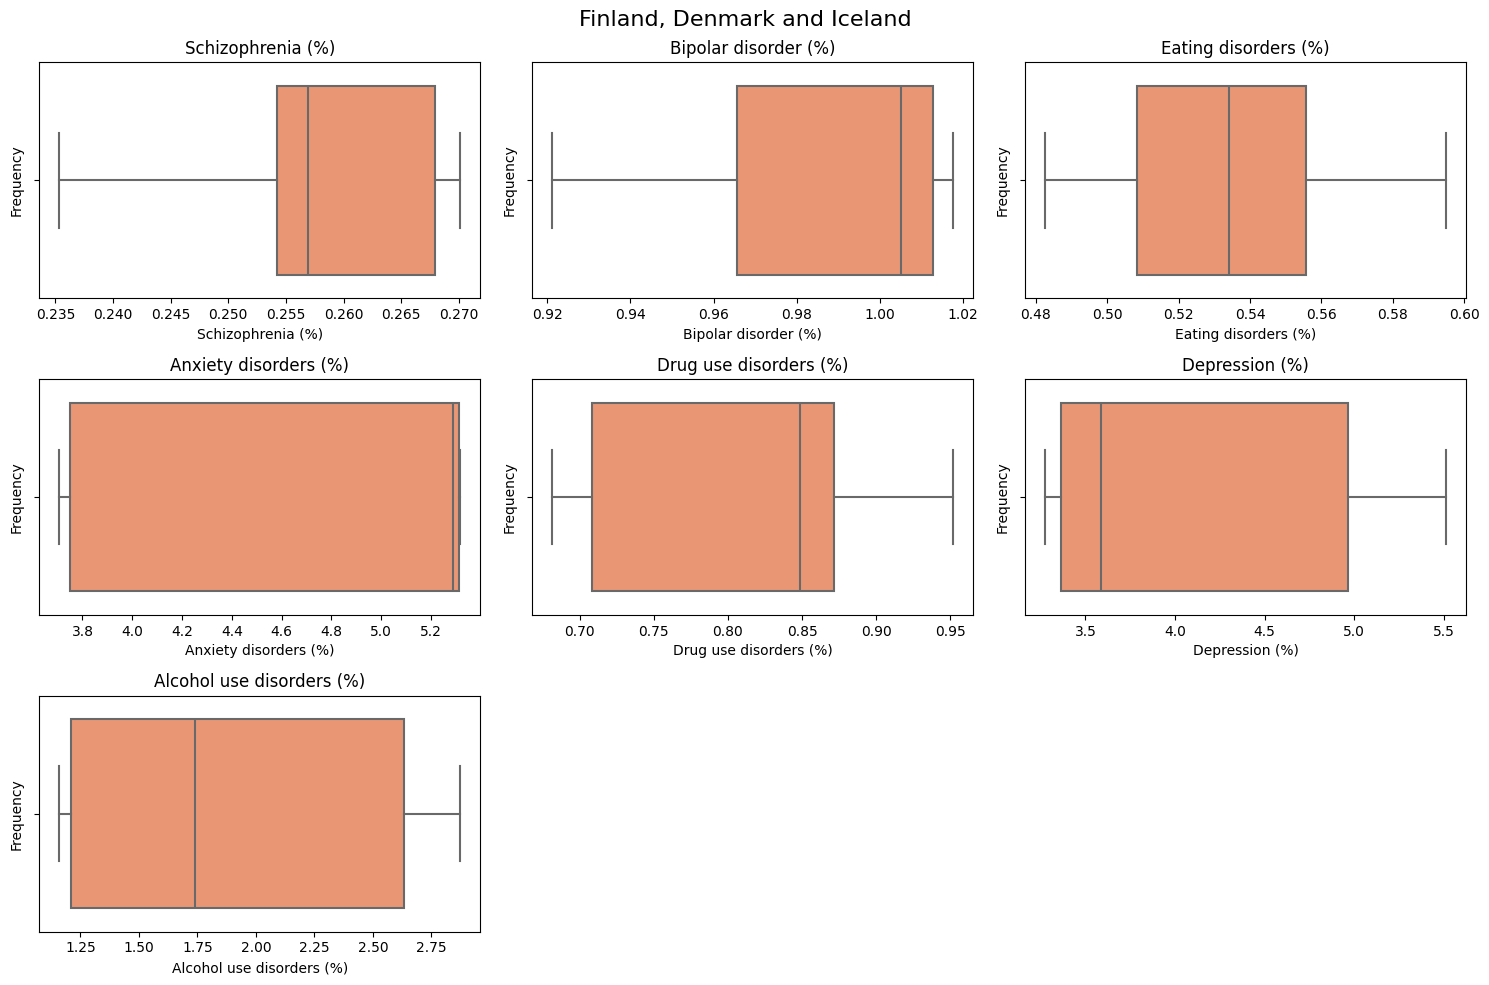

In [26]:
boxplots(top3_happy, "Finland, Denmark and Iceland")

We can see that the most depressed country is Finland (which has been the country with the highest happiness index for 7 years in a row). However, we can see that the percentage of depression is decreasing in all countries over time, with the exception of Denmark and Iceland in the 2010s. Also there is an interesting phenomenon, that Iceland used to have the smallest percentage of depression, but in 2000s Denmark has managed to become a country with the smallest depression percentage.

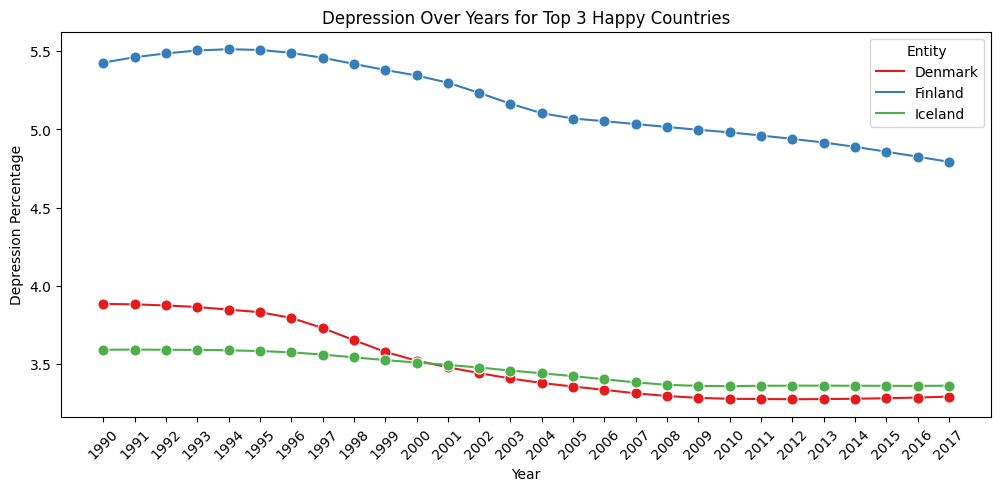

In [27]:
line('Year', 'Depression (%)', top3_happy, 'Depression Over Years for Top 3 Happy Countries', 'Year', 'Depression Percentage', 'Entity', 'Set1')

In contrast to the percentage of depression, we see that Finland has the lowest percentage of anxiety disorders. Another interesting finding is that anxiety tends not to change over time and remains relatively high, especially in Denmark and Iceland.

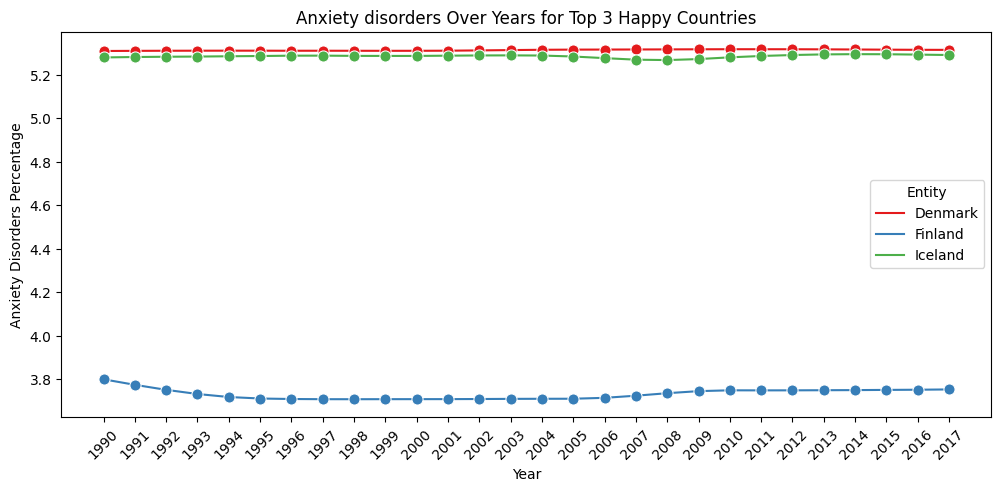

In [28]:
line('Year', 'Anxiety disorders (%)', top3_happy, 'Anxiety disorders Over Years for Top 3 Happy Countries', 'Year', 'Anxiety Disorders Percentage', 'Entity', 'Set1')

We can observe a rapid increase in alcohol consumption in Finland in the 90s, and it remained relatively high in the 2000s, and in the 2010s it started to decline in percentage terms. In Iceland, alcohol consumption has remained almost unchanged since 1990 and has always been very low, while in Denmark the percentage of drinking has not changed as much as in Finland, with the highest value in 2009.

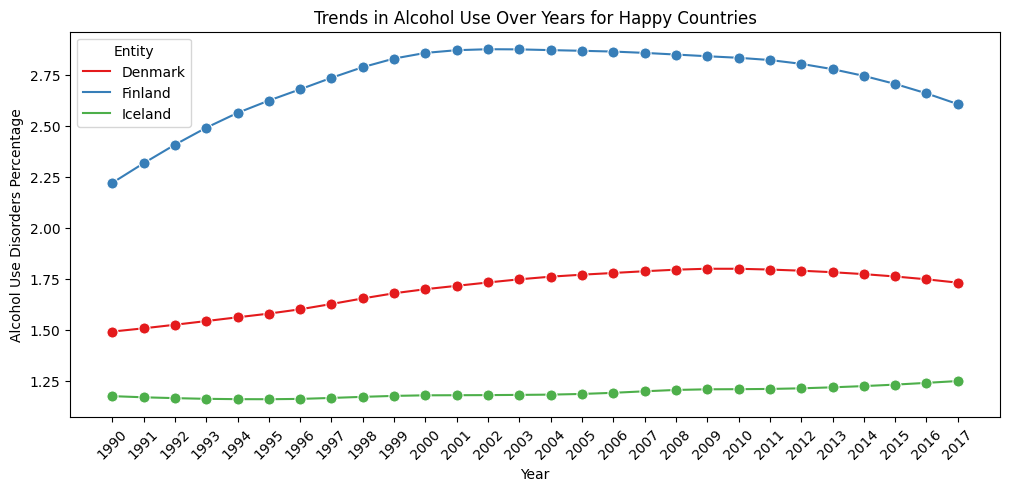

In [29]:
line('Year', 'Alcohol use disorders (%)', top3_happy, 'Trends in Alcohol Use Over Years for Happy Countries', 'Year', 'Alcohol Use Disorders Percentage', 'Entity', 'Set1')

The trends in drug use over time are particularly interesting, as they tend to increase over time, and I would like to point out that in Finland there was a rapid increase in drug use from 2000 to 2006, then it decreased slightly, and then started to increase again in 2010. My first thought was that maybe in the 2010s countries started legalising cannabis, so there was an increase in drug use disorders, but cannabis is still illegal in these countries (04.01.2024), so there must be another reason for the increase.

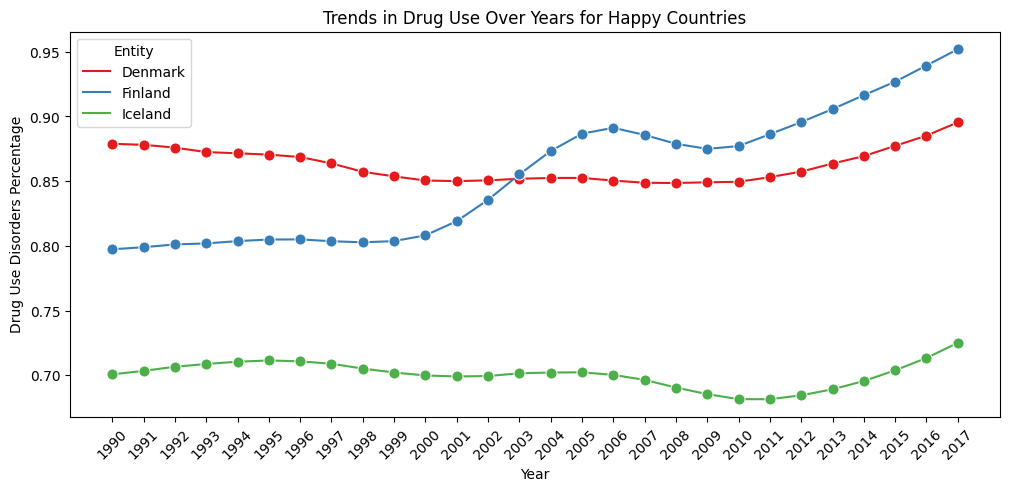

In [30]:
line('Year', 'Drug use disorders (%)', top3_happy, 'Trends in Drug Use Over Years for Happy Countries', 'Year', 'Drug Use Disorders Percentage', 'Entity', 'Set1')

Now lets see how different numbers in unhappy countries:

In [31]:
top3_unhappy = mental_df[(mental_df['Entity'] == "Afghanistan") | (mental_df['Entity'] == "Lebanon") | (mental_df['Entity'] == "Sierra Leone")]
top3_unhappy

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
5007,Sierra Leone,SLE,2013,0.164131,0.623461,0.104646,2.876716,0.482226,3.585279,0.933979
5008,Sierra Leone,SLE,2014,0.164417,0.623699,0.105673,2.877008,0.485009,3.583568,0.934882
5009,Sierra Leone,SLE,2015,0.164737,0.623994,0.106721,2.877733,0.488935,3.582731,0.935655
5010,Sierra Leone,SLE,2016,0.165087,0.624353,0.108252,2.878982,0.491967,3.581284,0.936256


In [32]:
top3_unhappy.describe()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.174185,0.771677,0.132701,4.578174,1.494119,3.776968,0.743206
std,0.015344,0.158392,0.048594,1.295828,0.772762,0.268504,0.124225
min,0.160022,0.622088,0.086021,2.876716,0.452387,3.329072,0.640186
25%,0.162912,0.623290,0.099122,2.888784,0.476806,3.573558,0.656021
50%,0.165179,0.702208,0.105158,4.848525,1.737408,3.733719,0.662324
75%,0.193651,0.986129,0.186673,5.958261,2.065637,4.108333,0.906653
max,0.198376,0.996153,0.219049,6.074404,2.576189,4.136347,0.936624


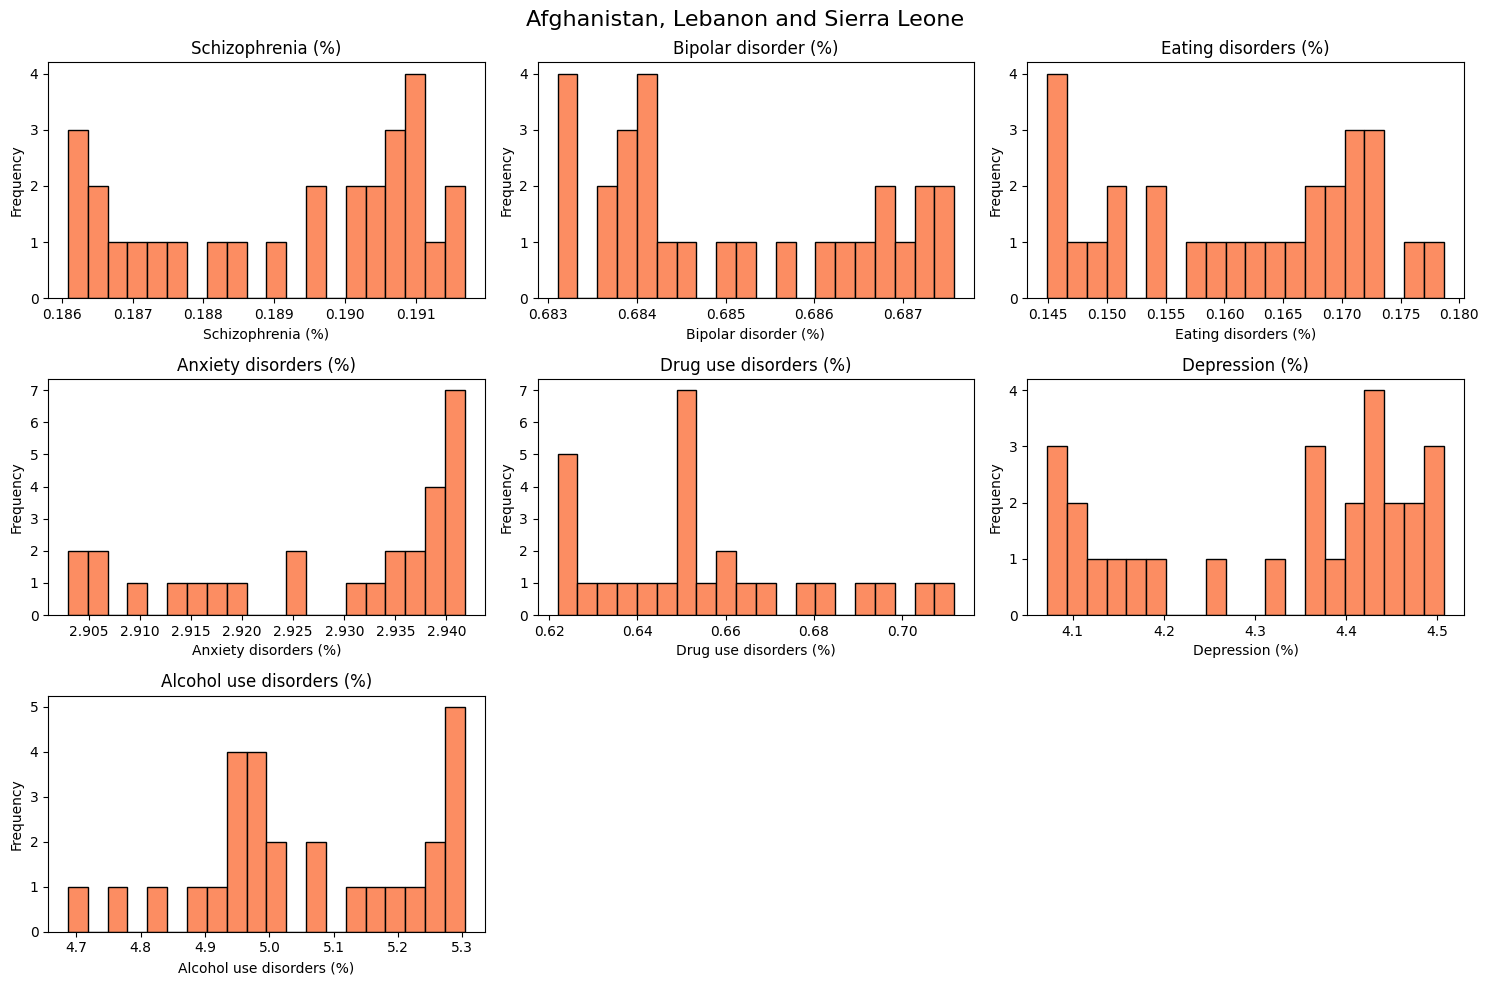

In [33]:
histograms(top3_unhappy, "Afghanistan, Lebanon and Sierra Leone")

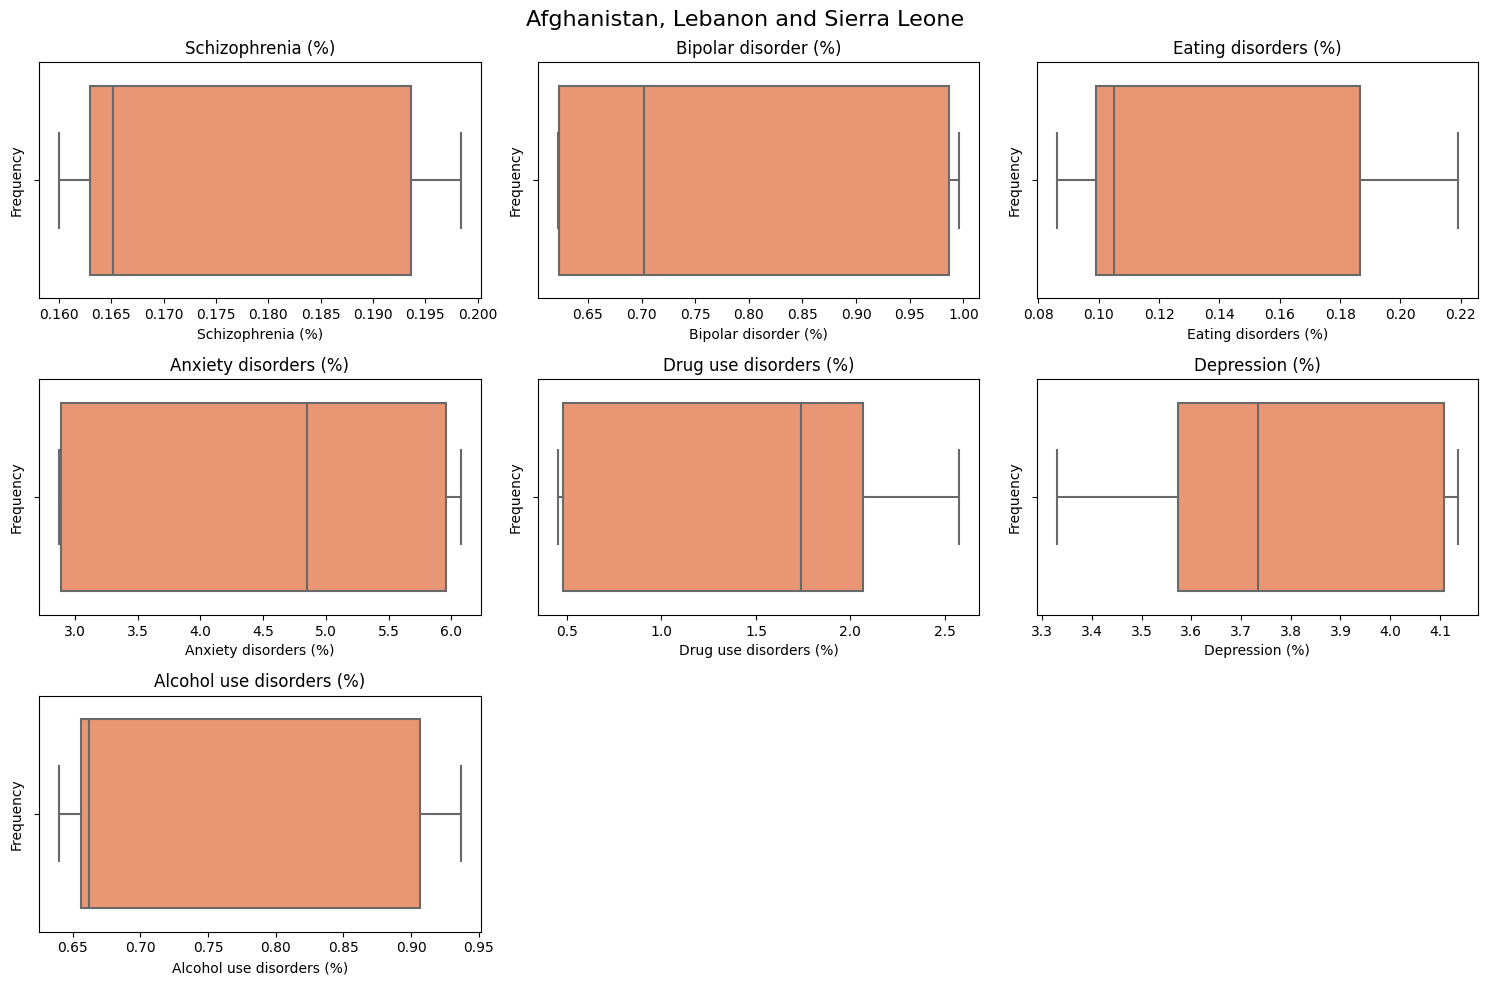

In [34]:
boxplots(top3_unhappy, "Afghanistan, Lebanon and Sierra Leone")

Focusing on depression, it can be seen that the percentage of depression in Afghanistan is relatively high and has been slowly increasing over time. In Lebanon, there was a rapid increase between 1990 and 2005, after which it tends to decline slowly over time. In Sierra Leone, the percentage of depression is clearly increasing over time, but it is relatively lower than in the other two countries.

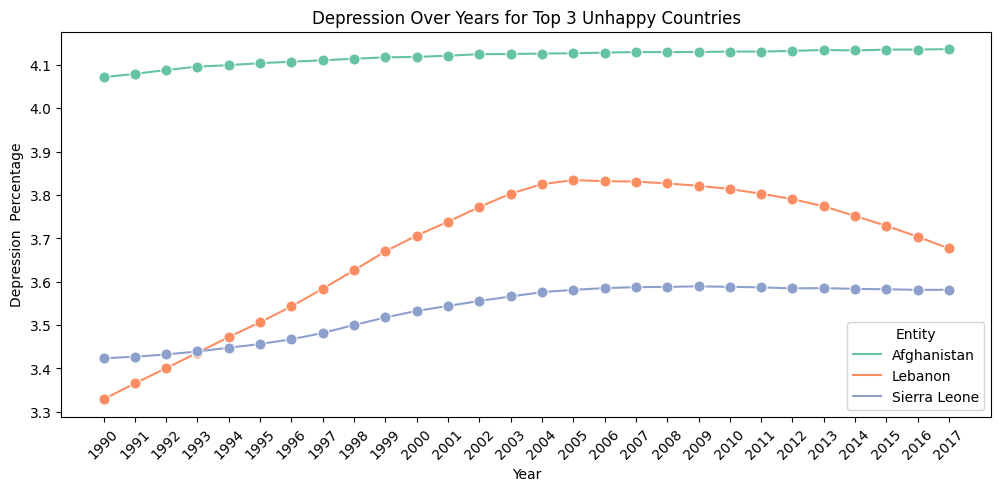

In [35]:
line('Year', 'Depression (%)', top3_unhappy, 'Depression Over Years for Top 3 Unhappy Countries', 'Year', 'Depression  Percentage', 'Entity', 'Set2')

Interesting observations were made about the percentage of anxiety: it does not seem to change over time in all three countries. However, it is worth noting the very high percentage of anxiety in Lebanon, where 6 out of 100 people have anxiety disorders.

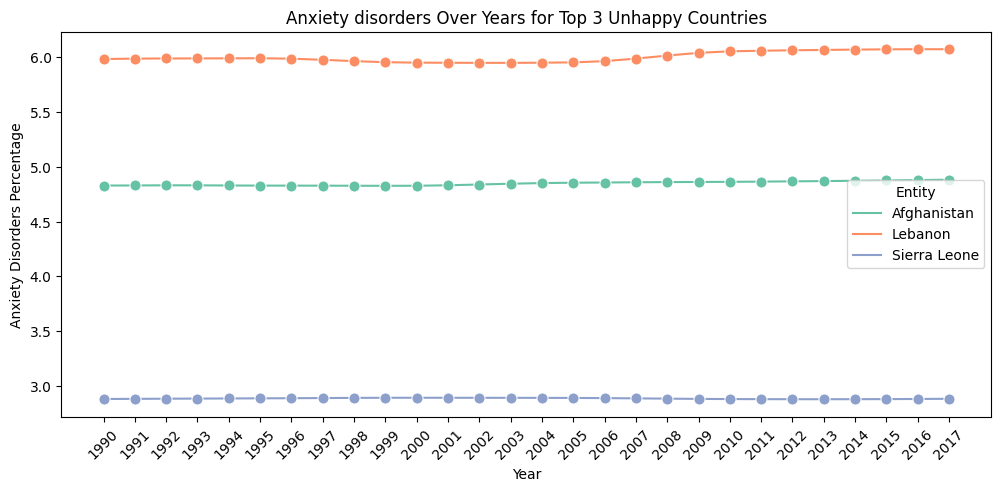

In [36]:
line('Year', 'Anxiety disorders (%)', top3_unhappy, 'Anxiety disorders Over Years for Top 3 Unhappy Countries', 'Year', 'Anxiety Disorders Percentage', 'Entity', 'Set2')

Speaking about alcohol disorders, we see that the percentages are very low, especially when compared to Ukraine. The reason for this low rate is that all of these countries are Muslim, and alcohol consumption is not allowed in Islam.

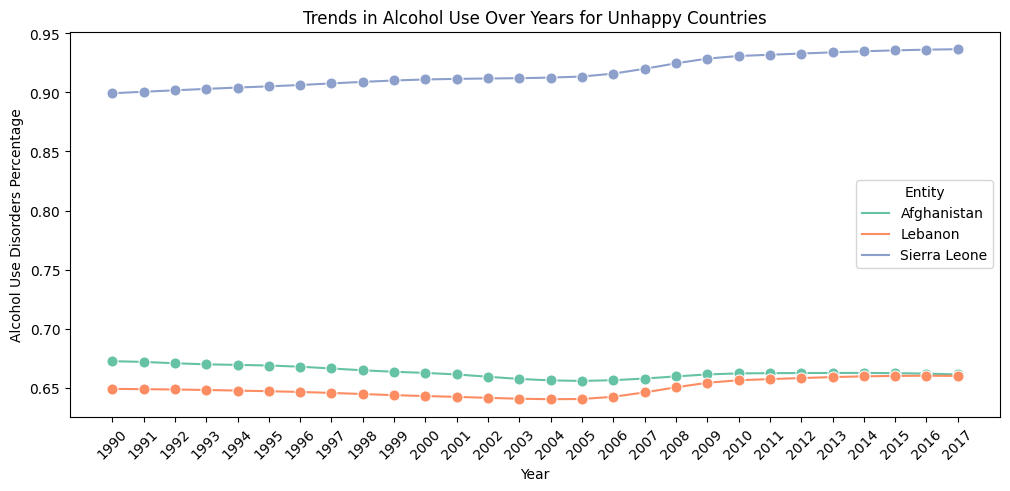

In [37]:
line('Year', 'Alcohol use disorders (%)', top3_unhappy, 'Trends in Alcohol Use Over Years for Unhappy Countries', 'Year', 'Alcohol Use Disorders Percentage', 'Entity', 'Set2')

In Sierra Leone, drug use is relatively lower than in Lebanon and Afghanistan and appears to have remained stable over time. In Lebanon, rates have been increasing linearly over time, and a similar situation is observed in Afghanistan, but there was a significant increase in the 2000s and a slow decline in 2010.

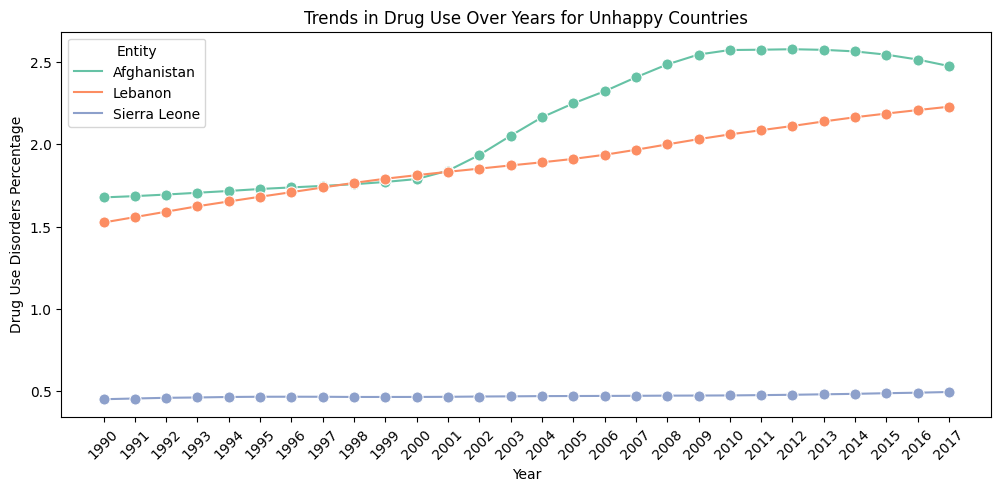

In [38]:
line('Year', 'Drug use disorders (%)', top3_unhappy, 'Trends in Drug Use Over Years for Unhappy Countries', 'Year', 'Drug Use Disorders Percentage', 'Entity', 'Set2')

Most trends are fairly linear or just constant, but the drug use percetages in Finland are quite strange, so I decided to investigate whether they depend on previous years. In order to do so we will analyse the lagged dependence of a time series.

C:\Users\Mykhailo Kushnir\AppData\Local\Temp\ipykernel_6732\3972093576.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  finland_drug_use = top3_happy[(mental_df['Entity'] == 'Finland')]


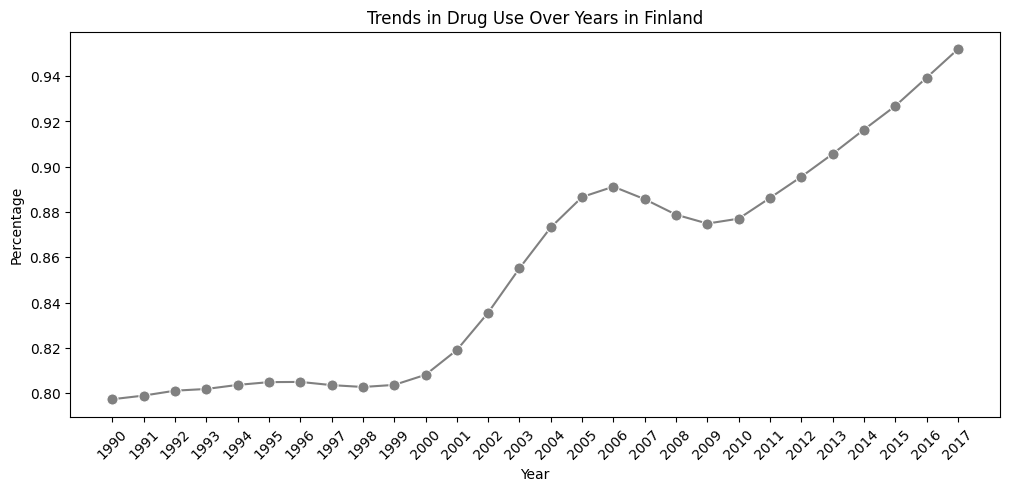

In [39]:
finland_drug_use = top3_happy[(mental_df['Entity'] == 'Finland')]

line('Year', 'Drug use disorders (%)', finland_drug_use, 'Trends in Drug Use Over Years in Finland', 'Year', 'Percentage')

Using the ACF plot, we can see that there is an obvious lagged relationship, and using the PACF, we can see that the most valuable relationship is the one with the previous year.

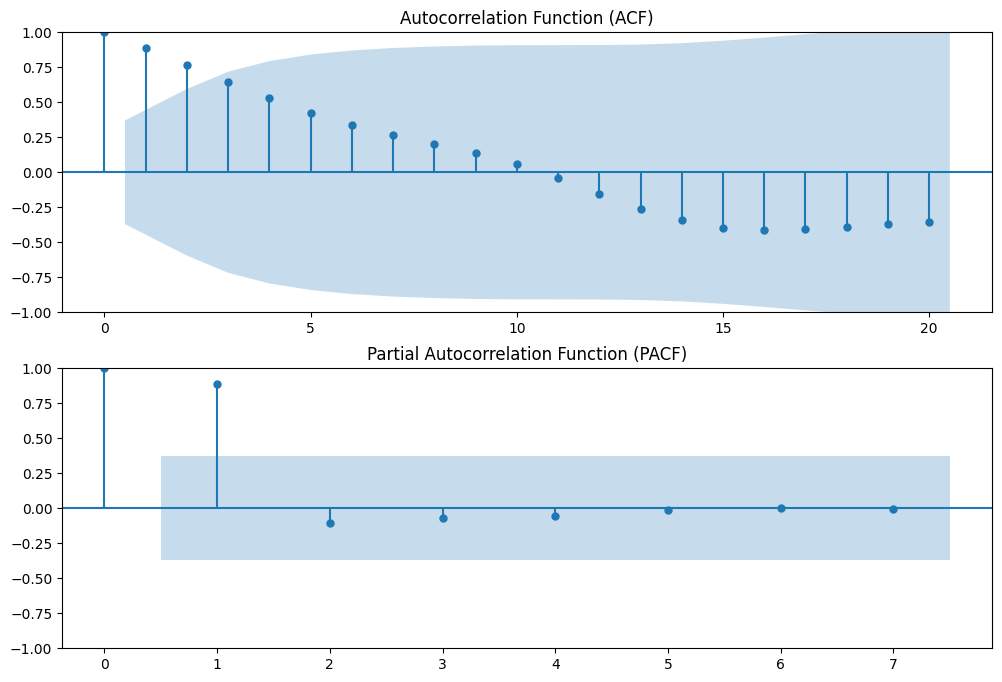

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
time_series = finland_drug_use['Drug use disorders (%)']
sm.graphics.tsa.plot_acf(time_series, lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

sm.graphics.tsa.plot_pacf(time_series, lags=7, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()


The last question I had was whether there is a statistically significant difference between happy and unhappy countries. To answer this question, the Kruskal-Wallis test was used because, unlike the t-test or ANOVA, it does not require normally distributed variables (and the variables we study are clearly not normally distributed).

Null hypothesis: the population median of all of the groups are equal

Alternative hypothesis: at least one population median differs from other population medians.

In [41]:
float_columns = top3_happy.select_dtypes(include='float64')

test_data = []

for column in float_columns.columns:
    group1 = top3_happy[column]
    group2 = top3_unhappy[column]
    
    h_statistic, p_value = kruskal(group1, group2)
    
    new_row = {'Disorder': column,
               'H-statistic': h_statistic,
               'p-value': p_value,
               'Null hypothesis rejected': 'Rejected' if p_value <= 0.05 else 'Failed to reject'}
    
    test_data.append(new_row)

test_df = pd.concat([pd.DataFrame([row]) for row in test_data], ignore_index=True)
test_df


,Disorder,H-statistic,p-value,Null hypothesis rejected
0,Schizophrenia (%),125.254438,4.477001e-29,Rejected
1,Bipolar disorder (%),75.771203,3.185125e-18,Rejected
2,Eating disorders (%),125.254596,4.476644e-29,Rejected
3,Anxiety disorders (%),1.546351,2.136749e-01,Failed to reject
4,Drug use disorders (%),13.917177,1.910445e-04,Rejected
5,Depression (%),0.887665,3.461110e-01,Failed to reject
6,Alcohol use disorders (%),125.254438,4.477001e-29,Rejected


So, in result, we can say that there is a statistically significant difference in all disorders between the 3 happiest countries and the 3 unhappiest countries, except for anxiety disorders and depression, where we are not confident enough to reject the null hypothesis.

### In summary

Even though we were able to find a statistically significant difference between happy and unhappy countries, the rates of depression and anxiety disorders are very high in all of these countries, which is a very interesting observation. I think that actually poor countries have a lot more problems with depression and anxiety disorders, but they just don't have a well-developed medical system, so many people in these countries just don't have the opportunity to get a proper medical examination, which is not the case in developed countries. In addition, the percentage of drug use disorders in Lebanon and Afghanistan is much higher than in Finland, Denmark and Iceland. Considering all of the above facts, we can conclude that mental disorders are still a huge problem in both happy and unhappy countries, but people in unhappy countries do not have access to a good medical system, so I can assume that the reality of the situation with mental disorders is much worse.

### Bonus

In the process of researching the dataset, I found that the rates of anxiety disorder were significantly higher than the rates of other disorders, so I decided to find which country or countries had such a high value of anxiety and found that the most anxious country was New Zealand, which is a well-developed country that is among the top 10 happiest countries in the world.

In [46]:
most_anxiety = mental_df.nlargest(5, 'Anxiety disorders (%)')
most_anxiety


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
4016,New Zealand,NZL,2002,0.339223,1.195859,0.635264,8.967330,2.141658,4.125419,1.447662
4017,New Zealand,NZL,2003,0.339718,1.197693,0.640880,8.966183,2.156798,4.126590,1.450309
4015,New Zealand,NZL,2001,0.338835,1.194346,0.630797,8.965461,2.128583,4.123757,1.447156
4018,New Zealand,NZL,2004,0.340177,1.199378,0.646286,8.962565,2.167622,4.126467,1.454776
4014,New Zealand,NZL,2000,0.338677,1.193562,0.627839,8.959512,2.120178,4.124330,1.449029
